In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

##  Import datasets

In [2]:
data = pd.read_csv("input/data.csv")
data_by_genre = pd.read_csv('input/data_by_genres.csv')
data_by_year = pd.read_csv('input/data_by_year.csv')

# Feature info

Columns and rows

In [3]:
data.shape

(170653, 19)

Feature datatype

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

NA and unique values

In [5]:

for col in data:
    print('Column: ' + col)
    print('Datatype: ', end='')
    print(data[col].dtype)
    print('NAs: ', end='')
    print(sum(data[col].isna()))
    print('Uniques: ', end='')
    print(len(data[col].unique()))
    print()


Column: valence
Datatype: float64
NAs: 0
Uniques: 1733

Column: year
Datatype: int64
NAs: 0
Uniques: 100

Column: acousticness
Datatype: float64
NAs: 0
Uniques: 4689

Column: artists
Datatype: object
NAs: 0
Uniques: 34088

Column: danceability
Datatype: float64
NAs: 0
Uniques: 1240

Column: duration_ms
Datatype: int64
NAs: 0
Uniques: 51755

Column: energy
Datatype: float64
NAs: 0
Uniques: 2332

Column: explicit
Datatype: int64
NAs: 0
Uniques: 2

Column: id
Datatype: object
NAs: 0
Uniques: 170653

Column: instrumentalness
Datatype: float64
NAs: 0
Uniques: 5401

Column: key
Datatype: int64
NAs: 0
Uniques: 12

Column: liveness
Datatype: float64
NAs: 0
Uniques: 1740

Column: loudness
Datatype: float64
NAs: 0
Uniques: 25410

Column: mode
Datatype: int64
NAs: 0
Uniques: 2

Column: name
Datatype: object
NAs: 0
Uniques: 133638

Column: popularity
Datatype: int64
NAs: 0
Uniques: 100

Column: release_date
Datatype: object
NAs: 0
Uniques: 11244

Column: speechiness
Datatype: float64
NAs: 0
Unique

Numeric columns are relevant

In [6]:
numeric_cols = list(data.select_dtypes(include = [np.int64, np.float64]).columns)
other_cols = list(data.select_dtypes(exclude = [np.int64, np.float64]).columns)

In [23]:
data[numeric_cols].describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


## Correlation

Numeric feature correlation with 'popularity' variable

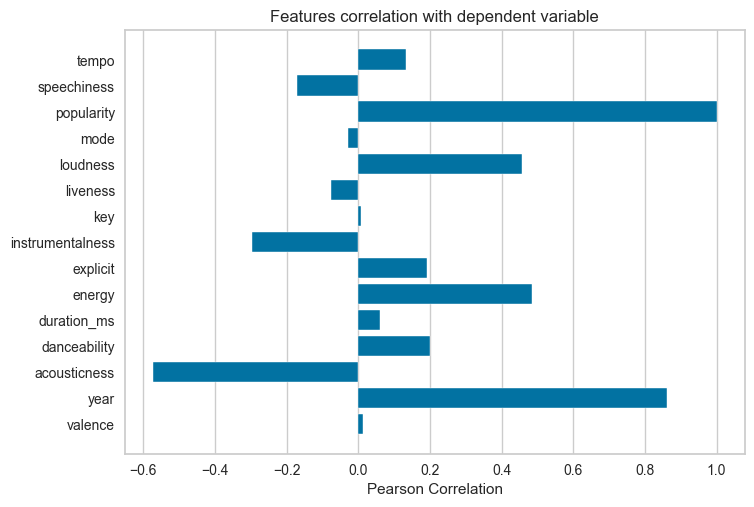

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [7]:
from yellowbrick.target import FeatureCorrelation

features, target = data[numeric_cols], data['popularity']

correlations = FeatureCorrelation(labels=np.array(numeric_cols))
correlations.fit(features,target)
correlations.show()

Correlation Matrix for all numeric features

<Axes: >

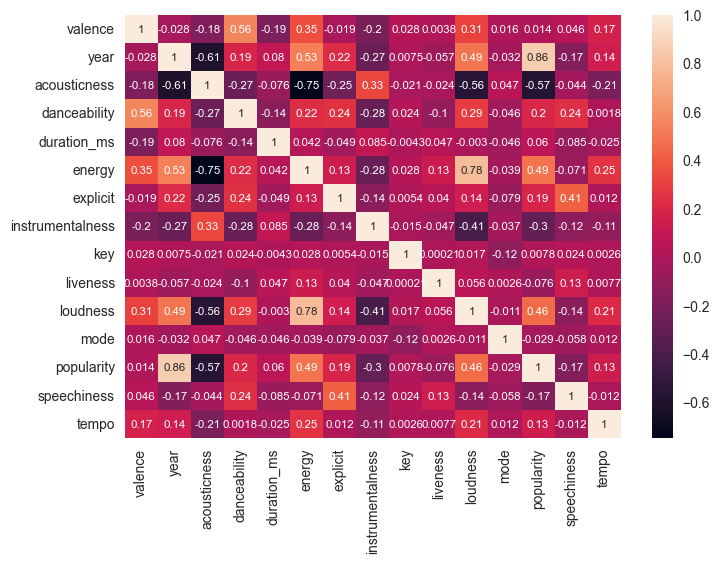

In [8]:
sns.heatmap(data[numeric_cols].corr(), annot=True, annot_kws={'fontsize':'x-small'})

## Trends

Histogram of songs by Decade

<Axes: xlabel='year', ylabel='Frequency'>

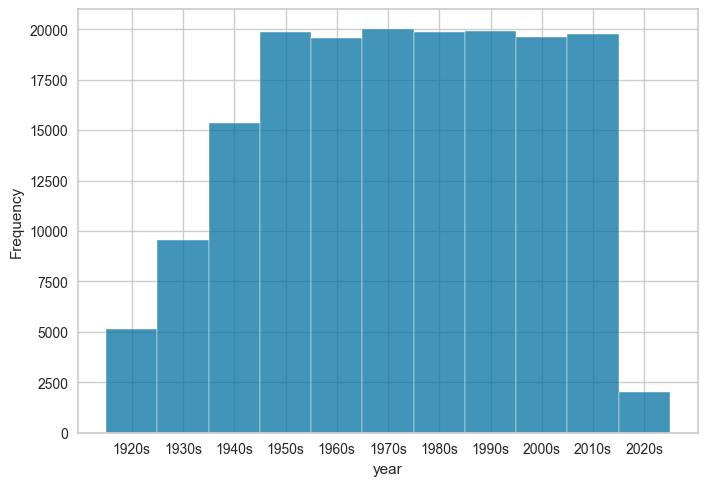

In [9]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

decades = data['year'].apply(get_decade)

sns.histplot(decades, stat='frequency')

Trends in music features in last 100 years

<Axes: >

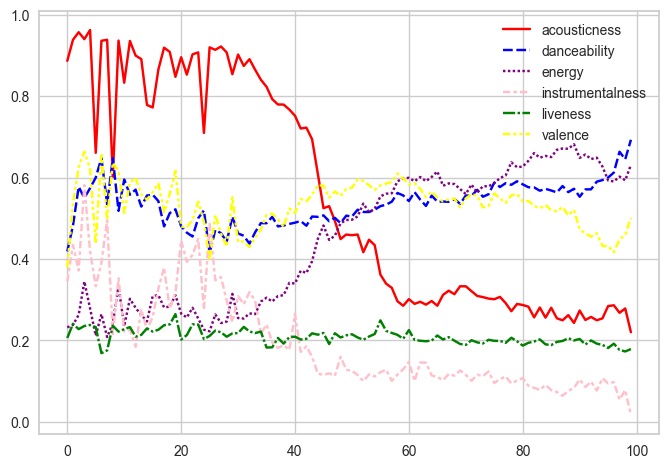

In [10]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

sns.lineplot(data_by_year[sound_features], palette=['red', 'blue', 'purple', 'pink', 'green', 'yellow'])


# Visualizing data using k-means

Select and standardize numeric features

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = data.select_dtypes(include=[np.int64, np.float64])
X = StandardScaler().fit_transform(X)

Elbow method

In [12]:
sse = []

for i in range(1,21):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(X)
    sse.append(km.inertia_)


Plot elbow graph

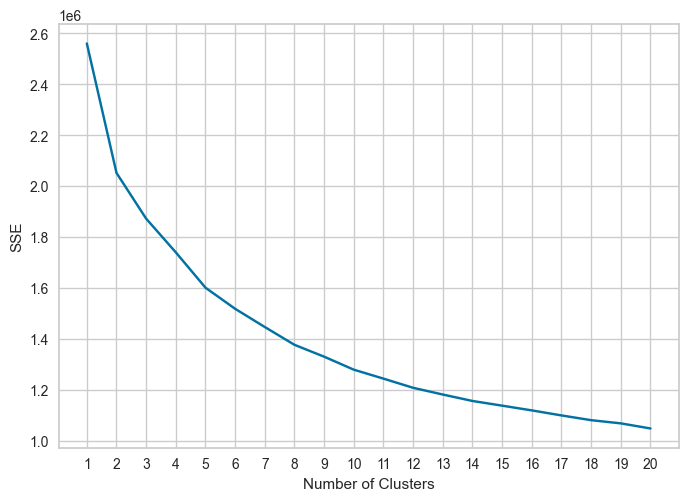

In [13]:

plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Elbow at 2 clusters

In [14]:
n_clusters = 2

Creating a cluster pipeline

In [15]:
scaler = ('scaler',  StandardScaler())
kmeans = ('kmeans', KMeans(n_clusters=n_clusters))

cluster_pipeline = Pipeline(steps=[scaler,kmeans])

Applying PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=100)
data['cluster'] = cluster_pipeline.fit_predict(X)
data_reduced = pca.fit_transform(X)

Create dataframe for visualization

In [17]:
data_reduced = pd.DataFrame(columns=['x', 'y'], data=data_reduced)
data_reduced['cluster'] = data['cluster']

## Plot clusters

<Axes: xlabel='x', ylabel='y'>

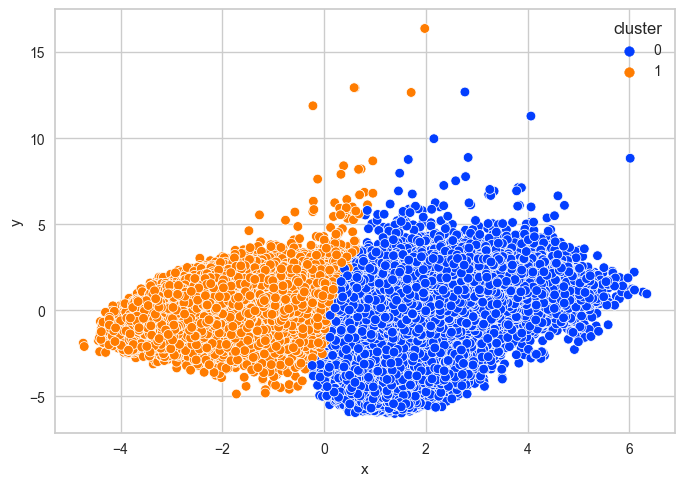

In [18]:
sns.scatterplot(data_reduced, x='x', y='y', hue='cluster', palette='bright')

## Visualizing data by genre

Clustering genre data

In [19]:

X = data_by_genre.select_dtypes(include=[np.int64, np.float64])
data_by_genre['cluster'] = cluster_pipeline.fit_predict(X)

Applying t-SNE

In [20]:
from sklearn.manifold import TSNE

tsne = ('tsne', TSNE(n_components=2))
tsne_pipeline = Pipeline(steps=[scaler,tsne])
data_by_genre_reduced = tsne_pipeline.fit_transform(X)

Create dataframe for visualization

In [21]:
data_by_genre_reduced = pd.DataFrame(data_by_genre_reduced, columns=['x', 'y'])
data_by_genre_reduced['cluster'] = data_by_genre['cluster']

Plot genre clusters

<Axes: xlabel='x', ylabel='y'>

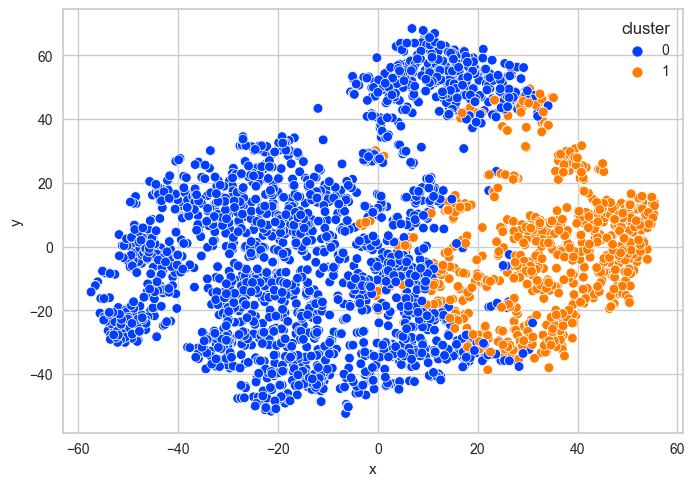

In [22]:
sns.scatterplot(data_by_genre_reduced, x='x', y='y', hue='cluster', palette='bright')